In [1]:
import os
import struct
from struct import unpack

import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# Helpers - credit 
# https://github.com/googlecreativelab/quickdraw-dataset/blob/master/examples/binary_file_parser.py
def unpack_drawing(file_handle):
    key_id, = unpack('Q', file_handle.read(8))
    countrycode, = unpack('2s', file_handle.read(2))
    recognized, = unpack('b', file_handle.read(1))
    timestamp, = unpack('I', file_handle.read(4))
    n_strokes, = unpack('H', file_handle.read(2))
    image = []
    for i in range(n_strokes):
        n_points, = unpack('H', file_handle.read(2))
        fmt = str(n_points) + 'B'
        x = unpack(fmt, file_handle.read(n_points))
        y = unpack(fmt, file_handle.read(n_points))
        image.append((x, y))

    return {
        'key_id': key_id,
        'countrycode': countrycode,
        'recognized': recognized,
        'timestamp': timestamp,
        'image': image
    }


def unpack_drawings(filename):
    with open(filename, 'rb') as f:
        while True:
            try:
                yield unpack_drawing(f)
            except struct.error:
                break
                
# little function that displays vector images and saves them to .svg
def draw_strokes(data, factor=0.2, svg_filename = '/tmp/sketch_rnn/svg/sample.svg'):
    tf.gfile.MakeDirs(os.path.dirname(svg_filename))
    min_x, max_x, min_y, max_y = get_bounds(data, factor)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)
    dwg = svgwrite.Drawing(svg_filename, size=dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    lift_pen = 1
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)
    command = "m"
    for i in xrange(len(data)):
        if (lift_pen == 1):
            command = "m"
        elif (command != "l"):
            command = "l"
        else:
            command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
    the_color = "black"
    stroke_width = 1
    dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
    dwg.save()
    display(SVG(dwg.tostring()))

In [3]:
data_path = 'data/pizza.npy'
data = np.load(data_path)

bin_data_path = 'data/pizza.bin'

for drawing in unpack_drawings(bin_data_path):
    # do something with the drawing
    print(drawing['image'])
#     plt.imshow(drawing['image'])
    print(drawing['countrycode'])
    break

[((147, 123, 0, 18, 61, 236, 243, 252, 255, 252, 231, 207, 198, 180, 136), (27, 40, 126, 136, 144, 158, 151, 127, 92, 63, 21, 3, 0, 0, 29)), ((177, 178, 204, 222, 225, 219), (1, 6, 37, 74, 132, 152)), ((165, 160, 158, 158, 167, 176, 180, 174, 160), (28, 28, 32, 47, 53, 53, 43, 29, 23)), ((112, 108, 106, 114, 125, 137, 144, 143, 138, 125, 114), (112, 113, 126, 134, 137, 135, 126, 116, 107, 104, 111)), ((45, 42, 45, 60, 72, 71, 68, 59, 51), (99, 108, 113, 115, 103, 94, 89, 88, 98)), ((201, 189, 186, 191, 201, 208, 207, 199, 191), (94, 104, 121, 130, 134, 129, 106, 94, 94)), ((132, 136), (58, 59))]
b'US'


loading pizza drawings
load complete
124422


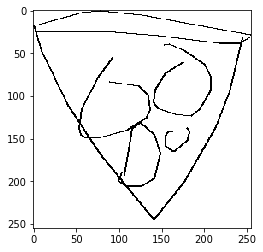

In [11]:
from quickdraw import QuickDrawDataGroup

pizzas = QuickDrawDataGroup("pizza", max_drawings=124422)
print(pizzas.drawing_count)
plt.imshow(pizzas.get_drawing().image)

SG


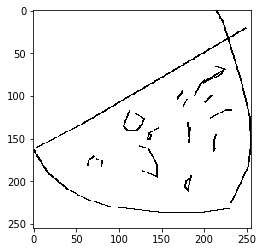

In [16]:
for drawing in pizzas.drawings:
    plt.imshow(drawing.image)
    break

In [18]:

codes = [d.countrycode for d in pizzas.drawings]

/Users/paulblankley/GitHub/projects/generative-tshirts/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'drawings' raised StopIteration
  


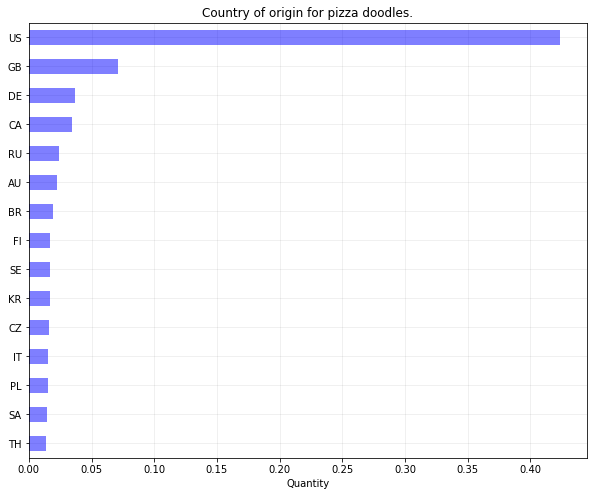

In [28]:

import pandas as pd 

def vc_plot(df_col, title='', top_n=15):
    fig,ax = plt.subplots(figsize=(10,8))
    vc_series = pd.Series(df_col).value_counts(normalize=True).head(top_n).sort_values(ascending=True)
    ax = vc_series.plot('barh', color='b', alpha=0.5, zorder=2, ax=ax)
    ax.set_title(f'{title}.')
    ax.set_xlabel('Quantity')
    ax.grid(color='grey', zorder=1, alpha=.15)

vc_plot(pd.Series(codes), title='Country of origin for pizza doodles')

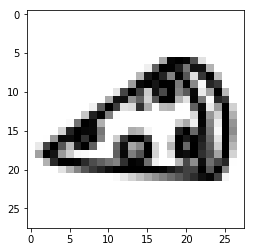

In [4]:
plt.imshow(data[0].reshape(28,28), cmap=plt.cm.gray_r)